<a href="https://colab.research.google.com/github/EugeneHsiung/datasci_6_anova/blob/main/datasci_6_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing packages**

In [25]:
!pip install ucimlrepo

In [70]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# **Loading in Data and Variables**

## **Question**: Does gender and A1Cresult influence on the time spent in the hospital (time_in_hospital)?

### **IV1**: gender
### **IV2**: A1Cresult
### **DV**: time spend in hospital


In [27]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [28]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [29]:
df = pd.DataFrame(X)      # dataframe for X
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [30]:
df1 = pd.DataFrame(y)      # dataframe for y
df1

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [31]:
df.sample(5)    # sample of 5 from x

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
83051,Caucasian,Female,[60-70),NaN,3,6,1,3,OG,NaN,...,No,No,No,No,No,No,No,No,No,Yes
9772,Caucasian,Male,[50-60),NaN,2,1,4,2,NaN,Cardiology,...,No,No,No,No,No,No,No,No,No,Yes
79604,Caucasian,Female,[60-70),NaN,1,1,7,3,MC,NaN,...,No,No,No,No,No,No,No,No,No,No
88393,Caucasian,Female,[60-70),NaN,2,11,7,3,MC,Emergency/Trauma,...,No,No,Steady,No,No,No,No,No,Ch,Yes
7552,Caucasian,Male,[70-80),NaN,2,1,1,5,NaN,Hematology/Oncology,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [32]:
df1.sample(5) # sample of 5 from y

,readmitted
91143,>30
7022,<30
46496,>30
91673,NO
12370,>30


# **Cleaning Data**

In [35]:
# creating subset of data with only variables of interest
df2 = df[['gender', 'A1Cresult', 'time_in_hospital']]
df2

,gender,A1Cresult,time_in_hospital
0,Female,None,1
1,Female,None,3
2,Female,None,2
3,Male,None,2
4,Male,None,1
...,...,...,...
101761,Male,>8,3
101762,Female,None,5
101763,Male,None,1
101764,Female,None,10


In [36]:
# missing values
df2.isna().sum()

gender              0
A1Cresult           0
time_in_hospital    0
dtype: int64

In [38]:
# IF there were missing values
df2_clean = df2.dropna()
df2_clean

,gender,A1Cresult,time_in_hospital
0,Female,None,1
1,Female,None,3
2,Female,None,2
3,Male,None,2
4,Male,None,1
...,...,...,...
101761,Male,>8,3
101762,Female,None,5
101763,Male,None,1
101764,Female,None,10


# **Assumption Check**

## **Normality**

In [63]:
stats.shapiro(df['time_in_hospital']) # Shapiro-Wilk test (shows whether or not there is a normal distribution)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)

#### **H0**: There is a normal distribution of data
#### **H1**: There is not a normal distrubtion of data
#### **Intepretation**: The P value (0.0) shown is less than 0.05, therefore the null hypothesis (H0) is rejected

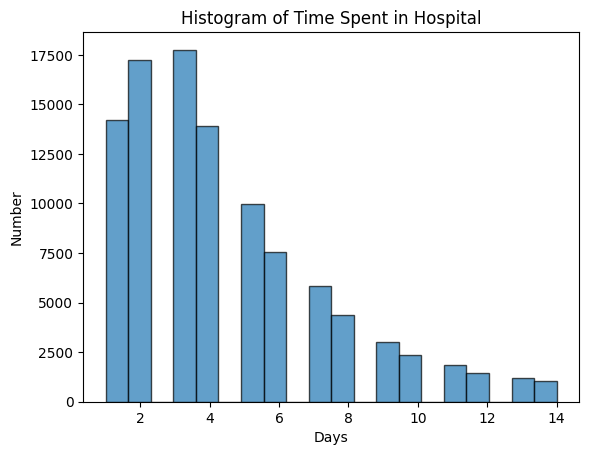

In [42]:
# Histogram depiciting DV (time_in_hospital)
plt.hist(df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time Spent in Hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

In [45]:
groups = df.groupby(['gender', 'A1Cresult'])

for (gender_status, A1Cresult_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({gender_status}, {A1Cresult_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (Female, >7):
P-value from Shapiro-Wilk Test: 6.890552164710837e-32

Group (Female, >8):
P-value from Shapiro-Wilk Test: 1.401298464324817e-45

Group (Female, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, Norm):
P-value from Shapiro-Wilk Test: 1.9355238408286022e-36

Group (Male, >7):
P-value from Shapiro-Wilk Test: 8.464994604522824e-32

Group (Male, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Male, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Male, Norm):
P-value from Shapiro-Wilk Test: 1.7862740121628182e-35

Group (Unknown/Invalid, None):
P-value from Shapiro-Wilk Test: 1.3144705723888706e-07



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# **Homoscedasticity (Equal Variances, Levene/Bartlett test)**

In [47]:
df2_clean['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [48]:
df2_clean['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [62]:
# Conducting the Levene's test, exlude unknown/invalid genders due to NaN

stats.levene(
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == '>7'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == '>8'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == 'None'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == 'Norm'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == '>7'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == '>8'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == 'None'],
  df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == 'Norm'],
)


LeveneResult(statistic=13.32930909061994, pvalue=2.638561805487543e-17)

#### **H0**: The variances are equal across groups
#### **H1**: The variances are not equal across groups
#### **Intepretation**: The P value shown is (2.638561805487543e-17) less than 0.05, therefore the null hypothesis (H0) is rejected. The variances are not equal across groups.

# **ANOVA**

In [64]:
model = ols('time_in_hospital ~ C(gender) * C(A1Cresult)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                               sum_sq        df             F        PR(>F)
C(gender)                    0.000005       2.0  2.565984e-07  9.995958e-01
C(A1Cresult)              6070.141438       3.0  2.282977e+02  1.184054e-99
C(gender):C(A1Cresult)     126.090836       6.0  2.371134e+00  5.007315e-02
Residual                901862.658109  101757.0           NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


**Intepretation #1**: The P value shown is (9.995958e-01) less than 0.05, therefore there is a significant difference in duration of stay when compared to gender, exluding A1Cresult

**Intepretation #2**: The P value shown is (1.184054e-99) less than 0.05, therefore there is a significant difference in duration of stay when compared to AlCresult, exluding gender

**Intepretation #3**: The P value shown is (9.995958e-01) less than 0.05, therefore there is a significant effect difference in duration of stay when compared to gender and A1Cresult

# **Kruskal-Wallis H Test (Non- Paramteric)**

In [67]:
# Kruskal-Wallis H Test used for data that is not normally distributed
# Creating groups
group1 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == '>7']
group2 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == '>8']
group3 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == 'None']
group4 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Female'][df2_clean['A1Cresult'] == 'Norm']
group5 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == '>7']
group6 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == '>8']
group7 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == 'None']
group8 = df2_clean['time_in_hospital'][df2_clean['gender'] == 'Male'][df2_clean['A1Cresult'] == 'Norm']

In [68]:
# Kruskal-Wallis H Test

h_stat, p_val = stats.kruskal(group1, group2, group3, group4, group5, group6, group7, group8)
print(f"H-statistic: {h_stat}")
print(f"P-value: {p_val}")

H-statistic: 663.6551734328741
P-value: 4.7107448897568605e-139


#### **Interpretation**: ***H-statistic*** shows overall difference among the groups. Large H-statistic (663.6551734328741) shows a greater overall difference in the distributions of the groups. A ***P-value*** of 4.7107448897568605e-139 shows that there are significant differences among the groups.

# **Post-hoc Test**

In [73]:
# Tukey post-hoc to determine which groups differ from each other

# For gender group
posthoc_gender = pairwise_tukeyhsd(endog=df2_clean['time_in_hospital'], groups=df2_clean['gender'], alpha=0.05)
print("Tukey HSD test for gender:\n", posthoc_gender)

Tukey HSD test for gender:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1      group2     meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
Female            Male   -0.179    0.0  -0.223 -0.1351   True
Female Unknown/Invalid  -1.1455 0.7839 -5.1831  2.8921  False
  Male Unknown/Invalid  -0.9664 0.8408 -5.0041  3.0712  False
-------------------------------------------------------------


In [74]:
# For A1Cresult group
posthoc_a1cresult = pairwise_tukeyhsd(endog=df2_clean['time_in_hospital'], groups=df2_clean['A1Cresult'], alpha=0.05)
print("\nTukey HSD test for A1Cresult:\n", posthoc_a1cresult)


Tukey HSD test for A1Cresult:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    >7     >8    -0.14 0.0773   -0.29  0.0099  False
    >7   None  -0.5808    0.0 -0.7075 -0.4541   True
    >7   Norm   0.0348 0.9486 -0.1299  0.1994  False
    >8   None  -0.4408    0.0 -0.5292 -0.3524   True
    >8   Norm   0.1748 0.0059  0.0374  0.3121   True
  None   Norm   0.6156    0.0  0.5041  0.7271   True
----------------------------------------------------


## Results for **gender**:

*   **Female and Male**: P value of: **0.0**, **less** than 0.05, The difference **is** statistically significant between the two groups
*   **Female and Unknown**: P value of: **0.7839**, **more** than 0.05, The difference **is not** statistically significant between the two groups
*   **Male and Unkown**: P value of: **0.8408**, **more** than 0.05, The difference **is not** statistically significant between the two groups

## Results for **A1Cresult group**

* **>7 and >8**: P value of: **0.0773**, **more** than 0.05, The difference **is not** statistically significant between the two groups
* **>7 and None**: P value of: **0.0**, **less** than 0.05, The difference **is** statistically significant between the two groups
* **>7 and Norm**: P value of: **0.9486**, **more** than 0.05, The difference **is not** statistically significant between the two groups
* **>8 and None**: P value of: **0.0**, **less** than 0.05, The difference **is** statistically significant between the two groups
* **>8 and Norm**: P value of: **0.0059**, **less** than 0.05, The difference **is** statistically significant between the two groups
* **None and Norm**: P value of: **0.0**, **less** than 0.05, The difference **is** statistically significant between the two groups
